In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

## Example: Inferring the probability of a coin toss from data

We toss a coin with an unknown probability of heads $\theta$ $N$ times independently, and we observe the result:

$$
x_{1:N} := (x_1,\dots,x_N).
$$

Assume that we have coded the result so that heads correspond to a "1" and tails to a "0."
We aim to estimate the probability of heads $\theta$ from this dataset.

Assuming that we know nothing, we set:

$$
\theta \sim U([0,1]).
$$

In terms of probability densities, this is:

$$
p(\theta) = 
\begin{cases}
1,&\;\text{if}\;\theta\in [0,1].\\
0,&\;\text{otherwise}
\end{cases}
$$

Now, let's write down the likelihood of the data.
Because of the independence assumption, we have:

$$
p(x_{1:N}|\theta) = \prod_{n=1}^Np(x_n|\theta).
$$

Then, each measurement is a Bernoulli with probability of success $\theta$, i.e.,

$$
x_n | \theta \sim \operatorname{Bernoulli}(\theta).
$$

In terms of probability densities, we have the likelihood:

$$
p(x_n|\theta)
= \begin{cases}
\theta,&\;\text{if}\;x_n=1,\\
1-\theta,&\;\text{otherwise}.
\end{cases}
$$

Using a common mathematical trick, we can rewrite this as:

$$
p(x_n|\theta) = \theta^{x_n}(1-\theta)^{1-x_n}.
$$

Work out the cases $x_n=0$ and $x_n=1$ to convince yourself.

Now, we can find the expression for the likelihood of the entire dataset.
It is:

$$
\begin{split}
p(x_{1:N}|\theta) &= \prod_{n=1}^Np(x_n|\theta)\\
&= \prod_{n=1}^N\theta^{x_n}(1-\theta)^{1-x_n}\\
&= \theta^{\sum_{n=1}^Nx_n}(1-\theta)^{N-\sum_{n=1}^Nx_n}.
\end{split}
$$

This intuitively means the probability of getting $\sum_{n=1}^Nx_n$ heads and the rest $N-\sum_{n=1}^Nx_n$ tails.

We can now find the posterior.
It is:

$$
\text{posterior} \propto \text{likelihood}\times\text{prior}.
$$

In our problem:

$$
\begin{split}
p(\theta|x_{1:N}) &\propto p(x_{1:N}|\theta)p(\theta)\\
&= \begin{cases}
\theta^{\sum_{n=1}^Nx_n}(1-\theta)^{N-\sum_{n=1}^N},&\;\text{if}\;\theta\in[0,1]\\
0,&\;\text{otherwise}.
\end{cases}
\end{split}
$$

And this is just the density corresponding to a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution):

$$
p(\theta|x_{1:N}) = \operatorname{Beta}\left(\theta\middle|1 + \sum_{n=1}^Nx_n, 1 + N - \sum_{n=1}^Nx_n\right).
$$

Let's try this out with some fake data.
Take a fake coin which is a little bit biased:

In [2]:
import scipy.stats as st
theta_true = 0.8
X = st.bernoulli(theta_true)

Sample from it a number of times to generate our data = (x1, ..., xN):

In [3]:
N = 5
data = X.rvs(size=N)
data

array([0, 1, 1, 1, 1])

Now we are ready to calculate the posterior which the Beta we have above:

In [4]:
alpha = 1.0 + data.sum()
beta = 1.0 + N - data.sum()
Theta_post = st.beta(alpha, beta)

And we can plot it:

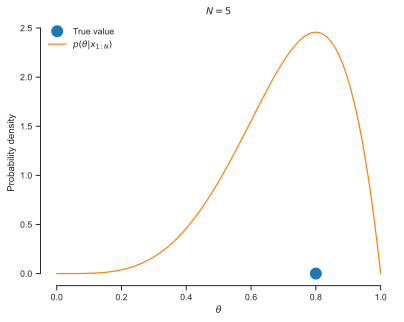

In [8]:
fig, ax = plt.subplots()
thetas = np.linspace(0, 1, 100)
ax.plot(
    [theta_true],
    [0.0],
    'o',
    markeredgewidth=2,
    markersize=10,
    label='True value'
)
ax.plot(
    thetas,
    Theta_post.pdf(thetas),
    label=r'$p(\theta|x_{1:N})$'
)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Probability density')
ax.set_title(f'$N={N}$')
plt.legend(loc='best', frameon=False)
sns.despine(trim=True);

## Questions

+ Try $N=0,5,10,100$ and see what happens.